In [1]:
from pythonMD import manager
from unum.units import *
import matplotlib.pyplot as plt
import pandas
import numpy

# Test Lennard-Jones
## Two particles no thermostat

In [2]:
positions = [(54.,56.,56.),(58.,56.,56.),(56.,58.,58.)]
myManager = manager(forces=["LJ"],boundaries=[111.3,111.3,111.3],prop=[("VelocityVerlet",1.)],dimensions=3,cutoff=10*ANGSTROM,dt=1*fs)
myManager.initialize(positions=positions,masses=40*U,temperature=0*K,types=["Ar" for p in range(len(positions))])
data = myManager.run(10000,LJ={"Ar-Ar":{"sigma":3.4*ANGSTROM,"epsilon": 1.656778224E-21*J}},saveStats=1,savePositions=100,printStats=100)

100 21.69041504756892 1.3469747744540299e-21 -4.159960789229111e-21 -2.8129860147750813e-21
200 30.867762468970707 1.916888049323081e-21 -4.729864702487274e-21 -2.8129766531641932e-21
300 23.960648453782913 1.4879562689799189e-21 -4.30092532248812e-21 -2.812969053508201e-21
400 16.42658923123985 1.0200911912599947e-21 -3.8330589080989016e-21 -2.812967716838907e-21
500 11.796448306080551 7.325594398076023e-22 -3.545527228654468e-21 -2.812967788846866e-21
600 9.922769802982312 6.162040047652017e-22 -3.42917225840927e-21 -2.8129682536440685e-21
700 9.600695133658794 5.962031678002111e-22 -3.409172606461818e-21 -2.812969438661607e-21
800 8.134424059832321 5.051477341155873e-22 -3.3181191691602716e-21 -2.8129714350446844e-21
900 2.7452204419921564 1.7047818944771293e-22 -2.983447234438943e-21 -2.81296904499123e-21
1000 0.5533717941912218 3.436438841927488e-23 -2.847330279698601e-21 -2.8129658912793263e-21
1100 6.846082581661388 4.2514172832117225e-22 -3.238113022332416e-21 -2.81297129401124

In [2]:
# positions = [(1.510,   1.518),(4.140,   4.118)]
positions = [(10.,   4.),(2.,   2.)]
boundaries = numpy.array([11.3,11.3])
myManager = manager(forces=["LJ"],boundaries=[11.3,11.3],prop=[("VelocityVerlet",1.)],cutoff=5*ANGSTROM,dt=0.1*fs,dimensions=2)
myManager.initialize(positions=positions,masses=40*U,temperature=300*K,types=["Ar" for p in range(len(positions))])
data = myManager.run(30000,LJ={"Ar-Ar":{"sigma":3.4*ANGSTROM,"epsilon": 1.656778224E-21*J}},saveStats=10,savePositions=10,printStats=10000,saveMomentum=10)

10000 754.7365370098063 2.0830728421470656e-20 -1.4142506630456192e-21 1.9416477758425037e-20
20000 735.301597832044 2.0294324100164414e-20 -8.777990491370025e-22 1.941652505102741e-20


In [2]:
# positions = [(1.510,   1.518),(4.140,   4.118)]
positions = [(4.,   4.),(2.,   6.)]
boundaries = numpy.array([11.3,11.3])
myManager = manager(forces=["LJ"],boundaries=[11.3,11.3],prop=[("VelocityVerlet",1.)],cutoff=5*ANGSTROM,dt=0.1*fs,dimensions=2)
myManager.initialize(positions=positions,masses=40*U,temperature=300*K,types=["Ar" for p in range(len(positions))])
data = myManager.run(30000,LJ={"Ar-Ar":{"sigma":3.4*ANGSTROM,"epsilon": 1.656778224E-21*J}},saveStats=10,savePositions=10,printStats=10000,saveMomentum=10)

> /home/ofirblumer/Projects/pythonMD/forceCalculator.py(148)findNeighbours()
    146                 import pdb
    147                 pdb.set_trace()
--> 148                 rijval = sum([r**2 for r in rij])**0.5
    149                 if abs(rijval) < self._cutoff:
    150                     neighboursList[i].append(j)



ipdb>  rij


array([ 2., -2.])


ipdb>  exit


BdbQuit: 

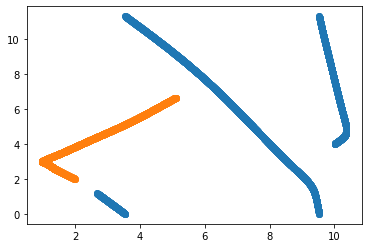

In [3]:
# xyz=myManager.makePositionsFile(data["positions"],"2particles.xyz")
results = pandas.DataFrame({"energy":data["totalEnergy"],"xmomentA":[moment[0][0] for moment in data["momenta"]],
                 "ymomentA":[moment[0][1] for moment in data["momenta"]],"xmomentB":[moment[1][0] for moment in data["momenta"]],
                 "ymomentB":[moment[1][1] for moment in data["momenta"]],
                 "xpositionsA":[position[0][0] for position in data["positions"]],
                 "ypositionsA":[position[0][1] for position in data["positions"]],"xpositionsB":[position[1][0] for position in data["positions"]],
                 "ypositionsB":[position[1][1] for position in data["positions"]]})
                
results["rijx"] = results.xpositionsA-results.xpositionsB
results["rijy"] = results.ypositionsA-results.ypositionsB
results["changex"] = 11.3*numpy.fix(results["rijx"]*2/11.3)
results["changey"] = 11.3*numpy.fix(results["rijy"]*2/11.3)
results["rijx"] -= results["changex"]
results["rijy"] -= results["changey"]
results["R"] = (results["rijx"]**2+results["rijy"]**2)**0.5
plt.scatter(results.loc[results.energy<3e-19].xpositionsA,results.loc[results.energy<3e-19].ypositionsA)
plt.scatter(results.loc[results.energy<3e-19].xpositionsB,results.loc[results.energy<3e-19].ypositionsB)

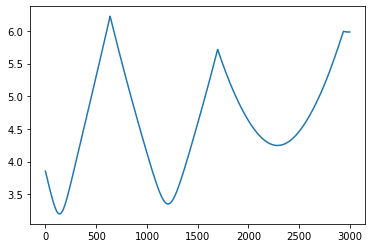

In [6]:
# plt.scatter(results.loc[results.energy>3e-19].loc[results.energy<3e-16].xpositionsA,results.loc[results.energy>3e-19].loc[results.energy<3e-16].ypositionsA)
# plt.scatter(results.loc[results.energy>3e-19].loc[results.energy<3e-16].xpositionsB,results.loc[results.energy>3e-19].loc[results.energy<3e-16].ypositionsB)
# plt.plot(results.loc[results.energy>3e-19].loc[results.energy<3e-16].R)
plt.plot(results.R)

In [92]:
# results.loc[results.energy>3e-19]
results[2030:2050]

,energy,xmomentA,ymomentA,xmomentB,ymomentB,xpositionsA,ypositionsA,xpositionsB,ypositionsB,rijx,rijy,changex,changey,R
2030,3.097811e-19,0.559395,-0.307590,-0.615518,0.633415,0.505776,0.829828,2.294434,10.050776,-1.788658,2.079052,-0.0,-11.3,2.742582
2031,3.370220e-19,0.573628,-0.324178,-0.629751,0.650003,0.519933,0.821938,2.278874,10.066811,-1.758940,2.055126,-0.0,-11.3,2.705072
2032,3.711954e-19,0.590882,-0.344392,-0.647005,0.670217,0.534483,0.813589,2.262922,10.083306,-1.728439,2.030284,-0.0,-11.3,2.666374
2033,4.146804e-19,0.611972,-0.369235,-0.668095,0.695061,0.549509,0.804680,2.246492,10.100360,-1.696983,2.004320,-0.0,-11.3,2.626223
2034,4.709840e-19,0.638021,-0.400092,-0.694144,0.725918,0.565122,0.795078,2.229476,10.118108,-1.664354,1.976970,-0.0,-11.3,2.584276
2035,5.454632e-19,0.670611,-0.438922,-0.726734,0.764748,0.581464,0.784610,2.211731,10.136722,-1.630267,1.947888,-0.0,-11.3,2.540086
2036,6.466583e-19,0.712055,-0.488597,-0.768178,0.814422,0.598725,0.773043,2.193067,10.156435,-1.594341,1.916608,-0.0,-11.3,2.493053
2037,7.889153e-19,0.765872,-0.553506,-0.821995,0.879331,0.617168,0.760055,2.173221,10.177568,-1.556053,1.882487,-0.0,-11.3,2.442347
2038,9.979669e-19,0.837714,-0.640721,-0.893837,0.966546,0.637166,0.745185,2.151819,10.200584,-1.514653,1.844601,-0.0,-11.3,2.386782
2039,1.324065e-18,0.937297,-0.762442,-0.993420,1.088268,0.659280,0.727737,2.128302,10.226177,-1.469022,1.801560,-0.0,-11.3,2.324574


## Increase timestep and check energy convergence

In [15]:
myManager = manager(forces=["LJ"],boundaries=[11.3,11.3,11.3],prop=[("VelocityVerlet",1.)],dimensions=3,cutoff=5*ANGSTROM,dt=0.5*fs)

# for dt in range(1,20,2):
#     myManager.dt = 0.01*dt

myManager.initialize(positions="coord_ex.xyz",masses=40*U,temperature=298*K,shiftPositions=[5.65,5.65,5.65])
data = myManager.run(5000,LJ={"Ar-Ar":{"sigma":3.4*ANGSTROM,"epsilon": 1.656778224E-21*J}},saveStats=1,savePositions=1,printStats=10)
totalRelativeEnergy = [abs((energy-data["totalEnergy"][0])*100/energy) for energy in data["totalEnergy"]]
totalRelativeEnergy.sort()
# print(f"maximum change in energy for dt={dt}: {totalRelativeEnergy[-1]}%")

Reading 32 atoms
10 291.97710625468716 1.934056351831048e-19 -2.8588808043129954e-19 -9.248244524819474e-20
20 291.63984428803883 1.9318223285639694e-19 -2.8566467327716717e-19 -9.248244042077023e-20
30 290.9433716073759 1.9272088935272582e-19 -2.852033262370198e-19 -9.248243688429398e-20
40 289.89596381389293 1.9202708643032267e-19 -2.845095209877055e-19 -9.248243455738285e-20
50 288.5046405554977 1.9110547390396166e-19 -2.8358790719429684e-19 -9.248243329033518e-20
60 286.77548289440415 1.8996007986925333e-19 -2.8244251274273833e-19 -9.2482432873485e-20
70 284.7140875925962 1.885946116213357e-19 -2.810770446673056e-19 -9.248243304596989e-20
80 282.3261377408069 1.870128336395105e-19 -2.7949526714555844e-19 -9.248243350604793e-20
90 279.61806544670486 1.852190065518973e-19 -2.7770144047558526e-19 -9.248243392368796e-20
100 276.5977770981298 1.8321836754980121e-19 -2.757008015051581e-19 -9.248243395535689e-20
110 273.27540676632964 1.8101762944201676e-19 -2.7350006270168304e-19 -9.2482

In [16]:
xyz=myManager.makePositionsFile(data["positions"],"testArgon.xyz")

In [8]:
import numpy
numpy.floor([-2.7,6.9])

array([-3.,  6.])